# 2IS50 Final Test - Tue 23 Jun 2020, 13:30-16:30

<div class="alert alert-warning" role="alert">
    <b>RUN THIS NOTEBOOK WITH <code>Kernel > Restart & Run All</code> BEFORE SUBMITTING</b>
</div>


# Introduction to this template exam notebook

* This is a **personal** notebook. 
* Make sure you work in a **copy** of `...-template.ipynb`,
    **renamed** to `...-yourIDnr.ipynb`,
    where `yourIDnr` is your TU/e identification number.  

You are expected to work with Python 3 code in this notebook.

The locations where you must write your answers can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
<br/>
NEVER write code that is needed for grading <i>outside</i> the marked blocks.
It is invisible there.
</div>

Proceed in this notebook as follows:
* **Personalize** the notebook (see below)
* **Read** the text.
* **Fill in** your answers between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'  # when first modified, e.g. '2019-04-18'
  ```

1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ as strings between quotes.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (0 points)

AUTHOR_NAME = 'Pradyut Nair'
AUTHOR_ID_NR = 1577239
AUTHOR_DATE = '17-06-2023'

#// END_TODO [Author]

AUTHOR_NAME, AUTHOR_ID_NR, AUTHOR_DATE

('Pradyut Nair', 1577239, '17-06-2023')

## Preliminaries

This final test consists of _four_ questions,
with _nine_ subquestions in total, for a maximum total of _70 points_.
It will be graded manually.

**Notes** state requirements.
It is obligatory to follow these for the maximum score.

**Hints** are helpful suggestions and reminders.

**Notes**:

For all functions and methods that you are asked to define:
* Include **type hints**.
* Include documentation in the form of a **docstring**, with **assumptions**.
* Unless otherwise stated, include **adequate doctest examples**.  
  Doctest examples are only required for the primary functions;
  that is, not for _auxiliary_ functions that you introduce yourself.
  
**Hints**:
* When you do not succeed in solving part of a question,
  proceed to the next part, assuming that solutions for preceding parts are available.  
  (Of course, this does make it harder for you to test your code,
  but you can define a 'dummy' solution to be able to run your code.)

In [2]:
# enable mypy type checking (if installed)

if 'nb_mypy' in get_ipython().magics_manager.magics.get('line'):
    %nb_mypy On
    %nb_mypy
else:
    print("nb-mypy.py not installed")

nb-mypy.py not installed


In [3]:
# import some useful facilities

import random
import math
import string
import collections as co
import itertools as it
from typing import Tuple, List, Set, Dict, DefaultDict, Counter, Iterator, Iterable
from typing import Any, Optional, Sequence, Mapping
import doctest
from pprint import pprint
# def _ip():
#     global _ip
#     import urllib.request
#     try:
#         return urllib.request.urlopen("https://api.ipify.org/").read().decode()
#     except:
#         pass
#     finally:
#         del _ip
# # To opt-out of IP address collection:
# # * under 0.c, add a remark stating why you do so, and
# # * comment out the next line, and uncomment the line below it
# _ip()
# # 'opt-out'

## 0. Online Exam Specials

### 0.a. Badge number and address

1. Copy the following lines of code:

  ```python
  AUTHOR_BADGE_NR = '7654321'  # printed sideways on campus card
  AUTHOR_ADDRESS = 'Street + number, postal code + city, country code (e.g. NL)'
  ```

1. Paste them between the marker lines in the next code cell.
1. Fill in the _badge number_ of your TU/e campus card (printed sideways)
   and the _author address_ where you take this exam, as strings between quotes.  
   To opt-out of author address collection:
   - under 0.c, add a remark to stating why you do so, and
   - assign `'opt-out'` to `AUTHOR_ADDRESS`
1. Run the code cell by putting the cursor there and typing **Control-Enter**.

In [4]:
#// BEGIN_TODO [badge_nr_address] Badge number and address, as strings

AUTHOR_BADGE_NR = 1577239
AUTHOR_ADDRESS = 'baslasd'
#// END_TODO [badge_nr_address]

AUTHOR_BADGE_NR, AUTHOR_ADDRESS

(1577239, 'baslasd')

### 0.b. Declaration of trust

Please read the following paragraph carefully, and acknowledge that you have done so
in the next code cell.

> By testing you remotely in this fashion,
> we express our trust that you will adhere
> to the ethical standard of behaviour expected of you.
> This means that we trust you to answer the questions and
> perform the assignments in this test to the best of your own ability,
> without seeking or accepting the help of any source
> that is not explicitly allowed by the conditions of this test.

Acknowledge by assigning the boolean value `True` to the variable `I_confirm`:

In [5]:
I_confirm: Optional[bool] = None

#// BEGIN_TODO [Declaration] Confirm by assigning True to I_confirm

I_confirm = True

#// END_TODO [Declaration]

I_confirm

True

### 0.c. Remarks from the student

In the following text cell, you can report any irregularities
that occurred during the exam.

`#// BEGIN_TODO [Remarks] Remarks about irregularities during exam`

<div class='alert alert-warning' role='alert'>Replace this line by your text.</div>

`#// END_TODO [Remarks]`

---

## 1. Two Miscellaneous Functions

### 1.a. Barber Paradox

Define function `diagonal(barber_clients)` that,
given a mapping from strings (barber names) to sets of strings (client names),
returns the set of keys (barbers) in the mapping that are _not_ contained in the corresponding set
(that do not shave themselves).
That is, the result set contains key $k$ if and only if $k \not\in \textit{barber_clients}[k]$.

> Background:
> The name 'diagonal' comes from the geometric interpretation of the latter formula,
> with a $k$ both left and right: the points $(x, x)$ are on a diagonal in the $x,y$-plane.
>
> This is related to the Barber Paradox: Can there be a barber who shaves all those,
> and those only, who do not shave themselves?
>
> Observe that `diagonal(barber_clients)` is, by its construction,
> not the value of any key in `barber_clients`.

**Examples**:
* `diagonal({})` returns `set()` (the empty set)
* `diagonal({'Co': {'Co'}, 'Di': {'Bo', 'Co'}, 'Ad': {}, 'Bo': {'Ad', 'Bo'}})` returns `{'Di', 'Ad'}`

**Notes**:
* Use `Mapping[str, Set[str]]` as type hint for the parameter.
* Besides the examples, also include a test case with
  a non-empty dictionary where the result is the empty set.

**Hints**:
* Don't forget the type hints and docstring with `doctest` examples.
* For testing, keep in mind that sets don't print in any particular order.
* Use set comprehension, or a `for` statement, together with `dict.items()`.

In [8]:
#// BEGIN_TODO [diagonal] Diagonal set (10 points)

def diagonal(barber_clients: Mapping[str, str]) -> Set[str]:
    """
    Find the barbers who do not shave themselves

    :param barber_clients: set of strings containing barbers and their clients
    :return: set of strings with barbers who do not shave themselves

    Assumptions:
    - Barber clients is a mapping containing strings as keys and a set of strings as values

    >>> diagonal({})
    set()

    >>> diagonal({'Co': {'Co'}, 'Di': {'Bo', 'Co'}, 'Ad': {}, 'Bo': {'Ad', 'Bo'}}) == {'Di', 'Ad'}
    True
    """
    if not barber_clients:
        return set()

    return {b for b in barber_clients if b not in barber_clients[b]}

#// END_TODO [diagonal]

In [9]:
doctest.run_docstring_examples(diagonal, globals(), verbose=True, name='diagonal')

Finding tests in diagonal
Trying:
    diagonal({})
Expecting:
    set()
ok
Trying:
    diagonal({'Co': {'Co'}, 'Di': {'Bo', 'Co'}, 'Ad': {}, 'Bo': {'Ad', 'Bo'}}) == {'Di', 'Ad'}
Expecting:
    True
ok


### 1.b.  Check whether a word is alternating

Define function `is_alternating(word)` that
determines whether the characters in a _non-empty_ word (of type `str`) alternate,
that is, whether
* all characters at the even indexes are the *same*,
* all characters at the odd indexes are the *same*, but
* characters at the even indexes *differ* from characters at the odd indexes (if any).

For example,
* `is_alternating('I')` returns `True`
* `is_alternating('papa')` returns `True`
* `is_alternating('daddy')` returns `False`
* `is_alternating('mmm')` returns `False`

**Notes**:
* Check the non-emptiness assumption with an `assert` statement.
* Also include a test case for this `assert`.

**Hints**:
* Don't forget type hints and a docstring with assumptions and `doctest` examples.
* Use slicing with step size 2, and sets.

In [40]:
#// BEGIN_TODO [is_alternating] Is word alternating? (10 points)

def is_alternating(word: str) -> bool:
    """
    Checks if word is alternating

    :param word: string
    :return: boolean indicating alternation

    Assumptions:
    - Word is non empty

    >>> is_alternating('I')
    True
    >>> is_alternating('papa')
    True
    >>> is_alternating('daddy')
    False
    >>> is_alternating('dadaday')
    False
    >>> is_alternating('dadadadada')
    True
    >>> is_alternating('mmm')
    False
    >>> is_alternating('')
    Traceback (most recent call last):
    ...
    AssertionError: word must not be empty
    """
    assert word, "word must not be empty"

    # Even slicing
    even = set(word[::2])

    # Verify that there is only a single letter in all even positions
    if len(even) > 1:
        return False

    # Verify that the letter in the odd place (if it exists) is not the same as the even letter
    try:
        if word[1] in even:
            return False

    # No letters in the first odd place
    except IndexError:
        return True

    # If word[1] is not in even, check if it is alternating
    else:
        odd = set(word) - even
        if len(odd) > 1:
            return False
        return True

#// END_TODO [is_alternating]

In [41]:
doctest.run_docstring_examples(is_alternating, globals(), verbose=True, name='is_alternating')

Finding tests in is_alternating
Trying:
    is_alternating('I')
Expecting:
    True
ok
Trying:
    is_alternating('papa')
Expecting:
    True
ok
Trying:
    is_alternating('daddy')
Expecting:
    False
ok
Trying:
    is_alternating('dadaday')
Expecting:
    False
ok
Trying:
    is_alternating('dadadadada')
Expecting:
    True
ok
Trying:
    is_alternating('mmm')
Expecting:
    False
ok
Trying:
    is_alternating('')
Expecting:
    Traceback (most recent call last):
    ...
    AssertionError: word must not be empty
ok


---

## 2. Sequence Classification and Functional Decomposition

Given is a text file `'data.txt'` with the outcomes of some binary experiments.
The two possible outcomes are represented by the characters `'|'` and `'_'`.
Each line concerns different circumstances of the experiment.
For example one line from that file looks like this:
```
|_|||_|____|_||___||_||||_|__||___||____||_|___|||||_|_||__|_|_||_||_______||___
```
We want to classify each line as
* Uniform or Biased (do outcomes occur in roughly the same proportion overall, or not), and as
* Independent or Dependent (do outcomes occur with a frequency that is (in)dependent of the preceding outcome).

The following monolithic code (with bad style) is given to accomplish this.

In [42]:
with open('data.txt') as f:
    for a in f:
        print(  a,   end=''  )
        b:Counter[str]=Counter()    
        c0=None  # previous character on line, if any
        for c1 in a.strip():
            if c0:
                b[c0+c1]+=1
            c0=c1
        if abs((b['__']+b['|_'])-(b['_|']+b['||']))/sum(b.values())<0.2:
                print('Uniform', end='')
        else:
            print('Biased', end='') 
        print(' and ', end='')
        if abs((b['__']*b['||'])-(b['_|']*b['|_']))/sum(b.values())<2.0:
            print('Independent')
        else:
                print('Dependent')
        print()

|||_|_____||_||_|||_|___|__|___||___|||__|____|___|||||____|__|_|_|_|_|||_|___|_
Uniform and Independent

__|__|__|_____|_||_|_|__|||_______|______________________|___|________|__||_|||_
Biased and Independent

_________|||_______||||||__________|||||__|||||||||____|||||||||||||||||____||__
Uniform and Dependent

_|_|_|__|_||_|||_|_|_|_||_|__|_|_|_|_|_|_|_|_|_|_|||_|_|_||_|_||||_||_||_|_|_|_|
Uniform and Dependent

|_|||_|____|_||___||_||||_|__||___||____||_|___|||||_|_||__|_|_||_||_______||___
Uniform and Independent

|____|_______|||_|__|____|__|_||_____|___|__|__|_||____||_||_|_____|||____|___|_
Biased and Independent

__|||||__||||||||||||___|||_____||||||||||___||_|___________||||||__|||||_______
Uniform and Dependent

_|_|_|_|_||_|_|_|_|_|_|__|__|_|_|_|||_|____|_||_|__|__|__|___|__||_|_|_|_|__|_|_
Uniform and Dependent



Define functions
* `count_pairs`
* `is_uniform`
* `is_dependent`
* `classify_file`, using the above three,

such that `classify_file('data.txt')` produces the same results as the monolithic code
(for all valid text files).

**Notes**:
* The function headers and docstrings are given.
* You may reuse the code given above, but you must clean it up.

### 2.a. Count pairs

Define function `count_pairs`
that takes a line (`str`) as argument and
returns a dictionary with counts for all pairs of adjacent characters.

For example,
* `count_pairs('mama')` return `{'ma': 2, 'am': 1}`
* `count_pairs('MISSISSIPPI')` returns `{'MI': 1, 'IS': 2, 'SS': 2, 'SI': 2, 'IP': 1, 'PP': 1, 'PI': 1}`

**Notes**:
* The implementation must be efficient: do not traverse the line over and over again.

In [46]:
def count_pairs(line: str) -> Counter[str]:
    """Return a counter with adjacent character pairs as key,
    and their occurrence count as value.
    
    Assumptions: none
    
    >>> count_pairs('')
    Counter()
    >>> count_pairs('A')
    Counter()
    >>> count_pairs('ii')
    Counter({'ii': 1})
    >>> count_pairs('mama') == Counter({'ma': 2, 'am': 1})
    True
    """

#// BEGIN_TODO [count_pairs] Count adjacent character pairs (5 points)
    assert isinstance(line, str), "line is not of type string"

    pair_count = Counter()

    if len(line) <= 1:
        return pair_count

    start = None

    for char in line.strip():
        if start:
            pair_count[start + char] += 1
        start = char

    return pair_count

#// END_TODO [count_pairs]

In [47]:
doctest.run_docstring_examples(count_pairs, globals(), verbose=True, name='count_pairs')

Finding tests in count_pairs
Trying:
    count_pairs('')
Expecting:
    Counter()
ok
Trying:
    count_pairs('A')
Expecting:
    Counter()
ok
Trying:
    count_pairs('ii')
Expecting:
    Counter({'ii': 1})
ok
Trying:
    count_pairs('mama') == Counter({'ma': 2, 'am': 1})
Expecting:
    True
ok


### 2.b. Uniform or biased?

In [65]:
def is_uniform(counts: Mapping[str, int]) -> str:
    """Classify counts as 'Uniform' or 'Biased'.
    <Details suppressed.  See monolithic code.>
    
    Assumptions:
    
    * set(counts.keys()) <= {'__', '_|', '|_', '||'}
    * all(counts[key] >= 0 for key in {'__', '_|', '|_', '||'})
    * sum(counts.values()) > 0
    
    >>> is_uniform(Counter({'_|': 10, '|_': 10}))
    'Uniform'
    >>> is_uniform(Counter({'||': 10}))
    'Biased'
    """
#// BEGIN_TODO [is_uniform] Is distribution uniform? (5 points)
    assert set(counts.keys()) <= {'__', '_|', '|_', '||'}, "Wrong keys"
    assert all(counts[key] >= 0 for key in {'__', '_|', '|_', '||'}), "Provide more values for each key"
    assert sum(counts.values()) > 0, "There must be values present for each key"

    if abs((counts['__']+counts['|_'])-(counts['_|']+counts['||']))/sum(counts.values())<0.2:
        return 'Uniform'
    return 'Biased'

#// END_TODO [is_uniform]

In [66]:
doctest.run_docstring_examples(is_uniform, globals(), verbose=True, name='is_uniform')

Finding tests in is_uniform
Trying:
    is_uniform(Counter({'_|': 10, '|_': 10}))
Expecting:
    'Uniform'
ok
Trying:
    is_uniform(Counter({'||': 10}))
Expecting:
    'Biased'
ok


### 2.c. Independent or dependent?

In [68]:
def is_independent(counts: Mapping[str, int]) -> str:
    """Classify counts as 'Independent' or 'Dependent'.
    <Details suppressed.  See monolithic code.>
    
    Assumptions:
    
    * set(counts.keys()) <= {'__', '_|', '|_', '||'}
    * all(counts[key] >= 0 for key in {'__', '_|', '|_', '||'})
    * sum(counts.values()) > 0
    
    >>> is_independent(Counter({'__': 1, '_|': 5, '|_': 5, '||': 25}))
    'Independent'
    >>> is_independent(Counter({'__': 10, '_|': 1, '||': 10}))
    'Dependent'
    """
    
#// BEGIN_TODO [is_independent] Is distribution independent? (5 points)
    assert set(counts.keys()) <= {'__', '_|', '|_', '||'}, "Wrong keys"
    assert all(counts[key] >= 0 for key in {'__', '_|', '|_', '||'}), "Provide more values for each key"
    assert sum(counts.values()) > 0, "There must be values present for each key"
    
    if abs((counts['__']*counts['||'])-(counts['_|']*counts['|_']))/sum(counts.values())<2.0:
        return 'Independent'
    return 'Dependent'

#// END_TODO [is_independent]

In [69]:
doctest.run_docstring_examples(is_independent, globals(), verbose=True, name='is_independent')

Finding tests in is_independent
Trying:
    is_independent(Counter({'__': 1, '_|': 5, '|_': 5, '||': 25}))
Expecting:
    'Independent'
ok
Trying:
    is_independent(Counter({'__': 10, '_|': 1, '||': 10}))
Expecting:
    'Dependent'
ok


### 2.d. Classify a file

**Notes**:
* Define function `classify_file` in terms of
  * `count_pairs`
  * `is_uniform`
  * `is_independent`

In [103]:
def classify_file(file_name: str) -> None:
    """Classify all lines of given file.
    <Details suppressed.  See monolithic code.>
    
    Assumptions:
    
    * named file exists as readable text file
    * each line in file consists of characters '_' and '|' only (and a newline)
    * each line in file has length at least two
    """

#// BEGIN_TODO [classify_file] Classify all lines in a file (5 points)

    assert open(file_name, 'r'), "File name is not readable or does not exist"

    with open(file_name, 'r') as file:
        for line in file:
            assert len(line) >= 2, "Length must be at least two"
            assert set(line) == {'_', '|', '\n'}, "Line must only contain '_', '|', '\n'"
            counts = count_pairs(line=line)
            uniformity = is_uniform(counts=counts)
            dependency = is_independent(counts=counts)
            print(line, end='')
            print(f"{uniformity} and {dependency}", end='\n \n')

#// END_TODO [classify_file]

In [104]:
classify_file('data.txt')

|||_|_____||_||_|||_|___|__|___||___|||__|____|___|||||____|__|_|_|_|_|||_|___|_
Uniform and Independent
 
__|__|__|_____|_||_|_|__|||_______|______________________|___|________|__||_|||_
Biased and Independent
 
_________|||_______||||||__________|||||__|||||||||____|||||||||||||||||____||__
Uniform and Dependent
 
_|_|_|__|_||_|||_|_|_|_||_|__|_|_|_|_|_|_|_|_|_|_|||_|_|_||_|_||||_||_||_|_|_|_|
Uniform and Dependent
 
|_|||_|____|_||___||_||||_|__||___||____||_|___|||||_|_||__|_|_||_||_______||___
Uniform and Independent
 
|____|_______|||_|__|____|__|_||_____|___|__|__|_||____||_||_|_____|||____|___|_
Biased and Independent
 
__|||||__||||||||||||___|||_____||||||||||___||_|___________||||||__|||||_______
Uniform and Dependent
 
_|_|_|_|_||_|_|_|_|_|_|__|__|_|_|_|||_|____|_||_|__|__|__|___|__||_|_|_|_|__|_|_
Uniform and Dependent
 


---

## 3. Light Bulbs in a Circle

Consider the following puzzle:

> In a circle are 100 light bulbs numbered clockwise $0$ through $99$, all initially _on_.
> At time $t$ (starting at $t=0$), you examine bulb number $t$
> (if $t > 99$, it's the light bulb whose number is the last two digits of $t$).
> If that light bulb is *on*, you change the state of the clockwise-next bulb number $t + 1$
> (on the clock, modulo 100);
> i.e., you turn _off_ the clockwise-next bulb if it's *on*, and _on_ if it's _off_.
> If bulb number $t$ is *off*, you do nothing.
>
> If you continue around and around the circle in this manner,
> will it ever happen that all $100$ bulbs will again be *on*?

The figure below illustrates a circle with 4 light bulbs.
The arrow points at the current bulb.
Underneath each circle is the string representation, _starting at the current bulb_.

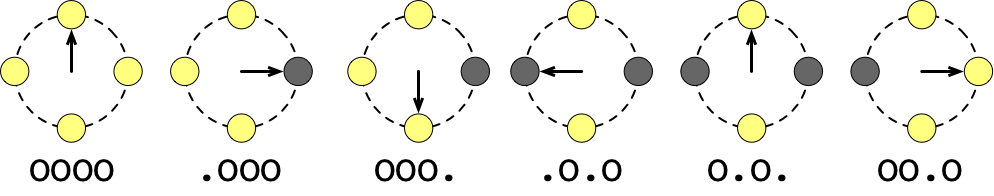

### 3.a. The class `BulbCircle`

To investigate this puzzle for smaller numbers of bulbs,
we introduce the (mutable) class `BulbCircle`,
which represents a circle of `self.n` light bulbs, each in an on or off state,
represented by a list `self.bulbs` of boolean values.
One of the bulbs (number `self.t`, starting at `0`) in the circle is the currently examined bulb,
or _current bulb_ for short.

When printing the circle of bulbs, we start with the current bulb
and print all bulbs in clockwise order.
An on bulb is printed as `'O'`, and an off bulb as `'.'`.
This is implemented in the given special method `__str__()`.

Complete the definition of class `BulbCircle`,
by implementing:
* method `step(self) -> None` that does one step:
  - based on the current bulb's state,
  - update the state of the clockwise-next bulb, and
  - make that bulb the current bulb by incrementing `self.t` cyclicly ('on the clock').
  

* method `step_until_all_on(self, verbose: bool = False) -> int`
  that steps until all bulbs are on again,
  and returns the number of steps taken.
  It does at least one step.
  So, if all bulbs are on at the start, then it will still start by doing a step.
  If `verbose` is `True`, then the circle is printed before/after each step.
  
  Just assume that eventually the all-on state will be reached again.

**Notes**:
* See the given doctest examples for further details.
* You don't need to implement the special method `__repr__` in this exam.
* The definitions of special methods `__iter__` and `__str__` are given.
  - `__iter__` returns an iterator over all bulbs, starting at the current bulb.
* You don't need to provide doctest examples for the methods.
* You do need to provide type hints (given) and an appropriate docstring.

**Hints**:
* You can use the remainder operator (`%`) to cyclically increment a value.
  - For example, on a 60-minute clock, the next minute after `m` is `(m + 1) % 60`.
* You can use the built-in function `all(iterable)`
  to check that all values in an interable are `True`.

In [147]:
class BulbCircle:
    """A BulbCircle object represents a circle of light bulbs,
    where one bulb is the currently examined bulb.
    
    >>> bc = BulbCircle(4)
    >>> for _ in range(6):
    ...     print(bc)
    ...     bc.step()
    OOOO
    .OOO
    OOO.
    .O.O
    O.O.
    OO.O
    >>> bc = BulbCircle(2)
    >>> bc.step_until_all_on(verbose=True)
    OO
    .O
    O.
    OO
    3
    >>> bc.step()
    >>> bc.step_until_all_on()
    2
    """
    def __iter__(self) -> Iterator[bool]:
        """Implement iter(self)."""
        for i in range(self.n):
            yield self.bulbs[(self.t + i) % self.n]
    
    def __str__(self) -> str:
        # relies on __iter__
        return ''.join('O' if b else '.' for b in self)
    
    def __init__(self, n: int) -> None:
        """Initialize circle with n bulbs, all on.
        
        Assumption: n >= 2
        """
        assert n >= 2, "n must be at least 2"
        self.n: int = n
        self.bulbs: List[bool] = n * [True]
        self.t: int = 0  # index of current bulb
        
#// BEGIN_TODO [BulbCircle] Complete definition of class BulbCircle (15 points)

    def step(self) -> None:
        """ Update the state of the next bulb based on current bulb
        """
        if self.bulbs[self.t]:
            self.bulbs[(self.t + 1) % self.n] = not self.bulbs[(self.t + 1) % self.n]
        self.t = (self.t + 1) % self.n

    def step_until_all_on(self, verbose: bool = False) -> int:
        """ Step until all bulbs are on again
        """
        if verbose:
            print(self)
        steps = 0
        if all(self.bulbs):
            self.step()
            steps += 1
        while not all(self.bulbs):
            if verbose:
                print(self)
            self.step()
            steps += 1
        if verbose:
            print(self)
        return steps

#// END_TODO [BulbCircle]

In [148]:
doctest.run_docstring_examples(BulbCircle, globals(), verbose=True, name='BulbCircle')

Finding tests in BulbCircle
Trying:
    bc = BulbCircle(4)
Expecting nothing
ok
Trying:
    for _ in range(6):
        print(bc)
        bc.step()
Expecting:
    OOOO
    .OOO
    OOO.
    .O.O
    O.O.
    OO.O
ok
Trying:
    bc = BulbCircle(2)
Expecting nothing
ok
Trying:
    bc.step_until_all_on(verbose=True)
Expecting:
    OO
    .O
    O.
    OO
    3
ok
Trying:
    bc.step()
Expecting nothing
ok
Trying:
    bc.step_until_all_on()
Expecting:
    2
ok


Observe that the all-off state is stable (all bulbs remain off after each step).

Let's explore the circle with 4 light bulbs, which together can be in $2^4 = 16$ states:

In [149]:
bc = BulbCircle(4)
bc.step_until_all_on(verbose=True)

OOOO
.OOO
OOO.
.O.O
O.O.
OO.O
..OO
.OO.
OO..
...O
..O.
.O..
O...
O..O
O.OO
OOOO


15

### 3.b. Tabulate cycle lengths

Define function `tabulate_cycles` to print a table with
* the number of bulbs in the circle,
* the _cycle length_ for this circle,
  that is, the (positive) number of steps it takes to go from all-on to all-on again, and
* the maximum possible cycle length computed as $2^n - 1$.

**Notes**:
* Assume that the all-on state cycles back onto itself.
* All columns are neatly aligned.
* See the given `doctest` examples for details.

**Hints**:
* You can use string formatting (`f`-string or `str.format()`)
  with the following widths for printing numbers in each column.
  - `n`: 3 wide
  - `cycle length`: 12 wide
  - `max`: 10 wide
  
  and separate columns by `' | '`.

In [190]:
def tabulate_cycles(sizes: Iterable[int]) -> None:
    """Print table with cycle lengths for bulb circles of each given size.
    
    >>> tabulate_cycles(range(2, 4+1))
      n | cycle length |        max
      2 |            3 |          3
      3 |            7 |          7
      4 |           15 |         15
    >>> tabulate_cycles([9, 10])
      n | cycle length |        max
      9 |           73 |        511
     10 |          889 |       1023
    """

#// BEGIN_TODO [tabulate_cycles] Tabulate cycle lengths (5 points)

    print(f"{'n': >3} | cycle length |" + '{0: >10}'.format('max'))
    for n in sizes:
        bc = BulbCircle(n)
        cycle_length = bc.step_until_all_on()
        print(f"{n: >3} | {cycle_length: >12} | {2**n - 1: >10}")

#// END_TODO [tabulate_cycles]

In [191]:
doctest.run_docstring_examples(tabulate_cycles, globals(), verbose=True, name='tabulate_cycles')

Finding tests in tabulate_cycles
Trying:
    tabulate_cycles(range(2, 4+1))
Expecting:
      n | cycle length |        max
      2 |            3 |          3
      3 |            7 |          7
      4 |           15 |         15
**********************************************************************
File "__main__", line 4, in tabulate_cycles
Failed example:
    tabulate_cycles(range(2, 4+1))
Expected:
      n | cycle length |        max
      2 |            3 |          3
      3 |            7 |          7
      4 |           15 |         15
Got:
      n | cycle length |       max
      2 |            3 |          3
      3 |            7 |          7
      4 |           15 |         15
Trying:
    tabulate_cycles([9, 10])
Expecting:
      n | cycle length |        max
      9 |           73 |        511
     10 |          889 |       1023
**********************************************************************
File "__main__", line 9, in tabulate_cycles
Failed example:
    tabulate_c

Here are the cycle lengths for bulb circles up to size 20.
This explains why you may not want to run the program for $n=100$.

In [192]:
tabulate_cycles(range(2, 20+1))

  n | cycle length |       max
  2 |            3 |          3
  3 |            7 |          7
  4 |           15 |         15
  5 |           21 |         31
  6 |           63 |         63
  7 |          127 |        127
  8 |           63 |        255
  9 |           73 |        511
 10 |          889 |       1023
 11 |         1533 |       2047
 12 |         3255 |       4095
 13 |         7905 |       8191
 14 |        11811 |      16383
 15 |        32767 |      32767
 16 |          255 |      65535
 17 |          273 |     131071
 18 |       253921 |     262143
 19 |       413385 |     524287
 20 |       761763 |    1048575


---

## 4. Software Engineering

### 4.a. Two most important lessons

Explain in your own words _what_ you consider the _two_ most important programming-related 'lessons'
(techniques, principles, advices, ...) taught in this course,
and explain _why_ you think so.

**Notes**:
* This question is _not_ about specific features of the Python programming language.
* Write complete sentences (not just some phrases and catchwords).
* There is no Momotor feedback for this question.

`#// BEGIN_TODO [Two_Lessons] Two most important lessons (10 points)`

<div class='alert alert-warning' role='alert'>Replace this line by your text.</div>

`#// END_TODO [Two_Lessons]`

---

## Final business

In [ ]:
doctest.testmod(verbose=False)  # with details

In [ ]:
%whos

---

## (End of Notebook)

&copy; 2020 - **TU/e** - Eindhoven University of Technology